# Part II - (Loan Data From Prosper)
## by (Mariam Fayena)

## Preliminary Wrangling
out of the 81 columns i choosed the data set i would focus on into a data fram which includes
* ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
* Term: The length of the loan expressed in months.	
* LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
* BorrowerRate: The Borrower's interest rate for this loan.
* ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.	
* ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
* BorrowerState:The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.


* Occupation: The Occupation selected by the Borrower at the time they created the listing.
* EmploymentStatus:The employment status of the borrower at the time they posted the listing.
* IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* IncomeRange: The income range of the borrower at the time the listing was created.
* LoanOriginalAmount: The origination amount of the loan.
* LoanOriginationDate: The date the loan was originated.
* Listing_category: The category of the listing that the borrower selected when posting their listing

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# read the data set in to data frame
df=pd.read_csv('prosperLoanData.csv')


In [3]:
# creating a data frame for the columns that are needed in this analysis
columns=['ListingNumber','Term','LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','LoanOriginationDate']
loan_data=df[columns]

In [4]:
# making a copy of the data set
loan=loan_data.copy()

In [5]:
# changing loan origination date to date type data
loan['LoanOriginationDate']=loan.loc[:,'LoanOriginationDate'].apply(pd.to_datetime, errors='coerce')

In [6]:
# renaming the coulmn names
loan=loan.rename(columns={"ProsperRating (Alpha)":"ProsperRating","ListingCategory (numeric)":"ListingCategory"})

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

### Do Prosper Rating and Prosper Score affect Borrower APR ?

* The observation from the plots shows that the higher the ratings, the lower the borrower APR. That means to have a good rating, ones APR must be below 0.1%
* the box plot shows an inverse relationship, which means the API is significant to have a good rating and score

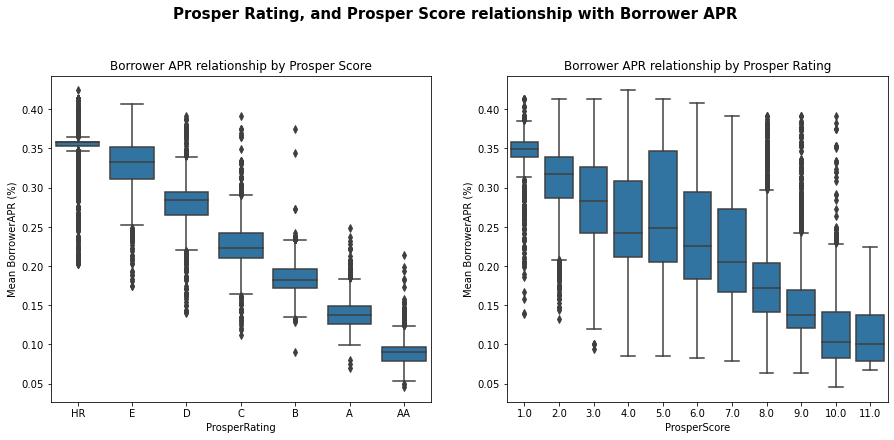

In [7]:
# seting the rating prosper rating order
rating=['HR','E','D','C','B','A','AA']
# ordering it into a categorical type data
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# setting it into the prosper rating
loan['ProsperRating'] = loan['ProsperRating'].astype(rate_set);
# setting the plot size
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
# creating colour palette
colour= sb.color_palette()[0]
sb.boxplot(data=loan, x='ProsperRating', y='BorrowerAPR',ax = ax[0], color=colour);
ax[0].set_title('Borrower APR relationship by Prosper Score')
ax[0].set_ylabel('Mean BorrowerAPR (%)')
# creating the second plot for the variable 
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', ax = ax[1],color=colour)
ax[1].set_title('Borrower APR relationship by Prosper Rating')
ax[1].set_ylabel('Mean BorrowerAPR (%)');
plt.suptitle("Prosper Rating, and Prosper Score relationship with Borrower APR", y = 1.04,fontsize=15,weight=("bold"));

## (Visualization 2)

### How does the Borrower APR affect the loan and Homeownership?

* the disribution shows that The borrowers APR had no effect on the home ownership. Although, the loan amount had an inverse relationship with borrower APR,the bigger your loan size the lower your API rate.

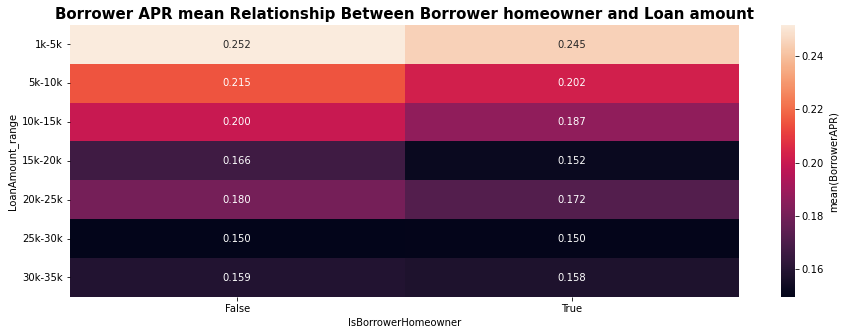

In [8]:
# using the pd.cut to set the Loan amount into range 
loan['LoanAmount_range']=pd.cut(loan.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
# adding the borrower APR to the chat
group=loan.groupby(['LoanAmount_range','IsBorrowerHomeowner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [15, 5]);
sb.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR mean Relationship Between Borrower homeowner and Loan amount',fontsize=15,weight=("bold"));

## (Visualization 3)

### Does the term have a significance effect on  the loan and APR?

* while adding Term to the distribution, the plot shows that the longer term(5 years) had higher borrower APR. which means the longer the term the individual collect the loan the higher their API gets.


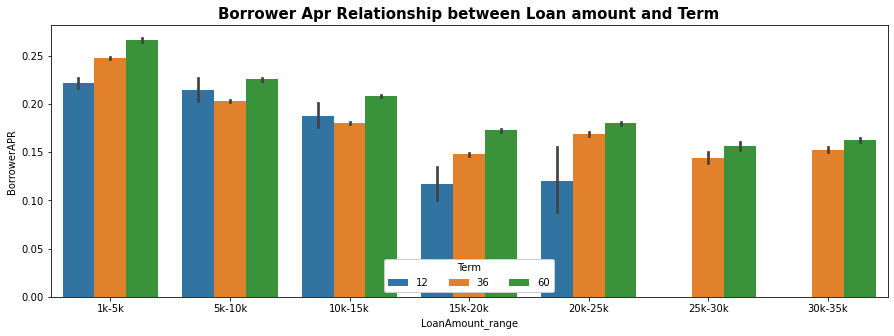

In [9]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5]);
yx=sb.barplot(data=loan,x='LoanAmount_range',y='BorrowerAPR',hue='Term');
yx.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term",fontsize=15,weight=("bold"));

## Key Insights for Presentation

 the investigation had a diffrent view when using the amount collected and the term of collection on how they affect the borrowers APR.the higher the API, the lower the loan collected. However, using the term shows the longer the term which loan was collected no matter the amount, the higher the APR gets.


In [11]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 683707 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Mariam\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Mariam\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Mariam\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Mariam\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Mariam\anaconda3\lib\site-pack